In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# === 1. Baca dataset dan tampilkan ===
print("\n=== 1. Membaca Dataset ===")
df = pd.read_csv("transaction.csv")
print(df.head())




=== 1. Membaca Dataset ===
   InvoiceNo  StockCode  Qty      InvoiceDate  CustomerID  Country
0     537626      22725  830  12/7/2010 14:57       12347  Iceland
1     537626      22729  948  12/7/2010 14:57       12347  Iceland
2     537626      22195  695  12/7/2010 14:57       12347  Iceland
3     542237      22725  636  1/26/2011 14:30       12347  Iceland
4     542237      22729  536  1/26/2011 14:30       12347  Iceland


In [7]:
# === 2. Hitung jumlah transaksi per negara dan tampilkan ===
print("\n=== 2. Hitung Kemunculan Tiap Negara ===")
country_counts = df['Country'].value_counts()
print(country_counts)


=== 2. Hitung Kemunculan Tiap Negara ===
Country
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community    

# **ANALISIS**

disini saya menghitung jumlah kemunculan nama tiap negara. Disini saya akan menggunakan kolom country saja lalu menggunakan fungsi value_counts() yang akan secara otomatis menghitung banyak kemunculan masing-masing nama negara di kolom country

In [8]:
# === 3. Hitung rata-rata jumlah barang (Qty) per transaksi pada tiap negara ===
print("\n=== 3. Hitung Rata-rata Qty per Transaksi Tiap Negara ===")
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
transaksi_per_invoice = df.groupby(['Country', 'InvoiceNo'])['Qty'].sum().reset_index()
avg_qty_per_country = transaksi_per_invoice.groupby('Country')['Qty'].mean().reset_index()
avg_qty_per_country.columns = ['Country', 'AvgQty']
print(avg_qty_per_country)


=== 3. Hitung Rata-rata Qty per Transaksi Tiap Negara ===
                 Country       AvgQty
0              Australia  4026.295455
1                Austria  3420.250000
2                Bahrain  1470.000000
3                Belgium  3032.714286
4                 Brazil  4389.000000
5                 Canada  6449.666667
6        Channel Islands  4569.714286
7                 Cyprus  3550.875000
8         Czech Republic  1239.500000
9                Denmark  3018.888889
10                  EIRE  3788.866071
11    European Community   921.666667
12               Finland  3118.000000
13                France  3197.549419
14               Germany  3119.766578
15                Greece  3473.000000
16               Iceland  3267.666667
17                Israel  7046.500000
18                 Italy  3186.096774
19                 Japan  3089.857143
20               Lebanon  2836.000000
21             Lithuania  2013.000000
22                 Malta  3758.500000
23           Netherlands  440

# **ANALISIS**


disini saya menghitung rata-rata jumlah barang setiap transaksi per negara. Untuk menghitung umlah barang yang dibeli dalam satu transaksi menggunakan groupby(), setelah itu menghitung rata-rata barang per transaksi untuk masing-masing negara. Hasilnya akan disimpan di kolom baru Bernama AvgQty

In [9]:
# === 4. Clustering dengan KMeans sebanyak 10 kali dan tampilkan nilai SSE ===
print("\n=== 4. Clustering KMeans 10x dan Nilai SSE ===")
cluster_i_list = []
cluster_val_list = []

for i in range(10):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
    kmeans.fit(avg_qty_per_country[['AvgQty']])
    cluster_i_list.append(kmeans.labels_)
    cluster_val_list.append(kmeans.inertia_)  # SSE
    print(f"Iterasi {i+1}: SSE = {kmeans.inertia_:.2f}")


=== 4. Clustering KMeans 10x dan Nilai SSE ===
Iterasi 1: SSE = 13229107.20
Iterasi 2: SSE = 13229107.20
Iterasi 3: SSE = 13229107.20
Iterasi 4: SSE = 13229107.20
Iterasi 5: SSE = 13229107.20
Iterasi 6: SSE = 13229107.20
Iterasi 7: SSE = 13229107.20
Iterasi 8: SSE = 13229107.20
Iterasi 9: SSE = 13229107.20
Iterasi 10: SSE = 13229107.20


# **ANALISIS**

Disini melakukan clustering menggunakan algoritma KMeans sebanyak 10 kali dengan jumlah cluster 3. Disini setiap melakukan clustering nilai sse nya akan disimpan.Semakin kecil nilai SSE, semakin baik model dalam memisahkan data ke dalam cluster 

In [10]:
 #=== 5. Ambil cluster_i dengan cluster_val terkecil ===
print("\n=== 5. Pilih Clustering Terbaik Berdasarkan SSE Terkecil ===")
best_index = np.argmin(cluster_val_list)
best_cluster_labels = cluster_i_list[best_index]
avg_qty_per_country['Cluster'] = best_cluster_labels
print(f"Iterasi terbaik adalah iterasi ke-{best_index+1} dengan SSE terkecil = {cluster_val_list[best_index]:.2f}")



=== 5. Pilih Clustering Terbaik Berdasarkan SSE Terkecil ===
Iterasi terbaik adalah iterasi ke-1 dengan SSE terkecil = 13229107.20


# **ANALISIS**

Disini  tahap pememilihan hasil clustering dengan nilai SSE terkecil, yang menunjukkan bahwa clustering tersebut adalah yang paling optimal. Nilai SSE terkecil membantu kita memilih cluster yang paling baik dalam membagi data. SSE terbaik didapatkan pada iterasi pertama yakni dengan nilai 13229107.20

In [11]:
# === 6. Tentukan posisi centroid dari setiap cluster ===
print("\n=== 6. Tentukan Posisi Centroid ===")
kmeans_final = KMeans(n_clusters=3, random_state=best_index, n_init='auto')
kmeans_final.fit(avg_qty_per_country[['AvgQty']])
centroids = kmeans_final.cluster_centers_.flatten()
print(f"Centroid cluster: {centroids}")


=== 6. Tentukan Posisi Centroid ===
Centroid cluster: [3542.21952146 6173.85081301 1400.13034188]


# **ANALISIS**

Setelah memilih clustering terbaik, selanjutnya masuk ke tahap mengidentifikasi posisi centroid dari setiap cluster. Centroid ini mewakili pusat dari masing-masing cluster. Nilai centroid menunjukkan rata-rata AvgQty untuk data yang ada di dalam masing-masing cluster.

In [12]:
# === 7. Urutkan centroid secara ascending ===
print("\n=== 7. Urutkan Centroid Secara Ascending ===")
sorted_centroids = np.sort(centroids)
print(f"Centroid setelah diurutkan: {sorted_centroids}")

# === 7b. Tampilkan batasan nilai (range) per cluster berdasarkan centroid ===
print("\n=== 7b. Batasan Nilai Cluster Berdasarkan Centroid ===")

for i in range(len(sorted_centroids)):
    if i == 0:
        print(f"Cluster Rendah: AvgQty <= {sorted_centroids[i]:.2f}")
    elif i == 1:
        print(f"Cluster Sedang: {sorted_centroids[i-1]:.2f} < AvgQty <= {sorted_centroids[i]:.2f}")
    else:
        print(f"Cluster Tinggi: AvgQty > {sorted_centroids[i-1]:.2f}")


=== 7. Urutkan Centroid Secara Ascending ===
Centroid setelah diurutkan: [1400.13034188 3542.21952146 6173.85081301]

=== 7b. Batasan Nilai Cluster Berdasarkan Centroid ===
Cluster Rendah: AvgQty <= 1400.13
Cluster Sedang: 1400.13 < AvgQty <= 3542.22
Cluster Tinggi: AvgQty > 3542.22


# **ANALISIS**

Setelah memperoleh centroid, kita mengurutkannya secara ascending. Ini penting karena kita akan mengaitkan urutan centroid dengan label Rendah, Sedang, dan Tinggi berdasarkan posisi centroid. Cluster dengan centroid terkecil akan dianggap sebagai cluster Rendah, sedangkan yang terbesar akan dianggap Tinggi, dan yang di antaranya adalah Sedang.

In [13]:

# === 8. Interpretasi cluster (rendah, sedang, tinggi) dan tampilkan negara per cluster ===
print("\n=== 8. Interpretasi Cluster (Rendah, Sedang, Tinggi) ===")
cluster_to_position = {}
for idx, c in enumerate(centroids):
    pos = np.where(sorted_centroids == c)[0][0]
    cluster_to_position[idx] = pos

avg_qty_per_country['ClusterLevel'] = avg_qty_per_country['Cluster'].map(cluster_to_position)

# Mapping label dan warna
cluster_labels = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}
color_map = {0: 'red', 1: 'orange', 2: 'green'}
avg_qty_per_country['ClusterLabelText'] = avg_qty_per_country['ClusterLevel'].map(cluster_labels)
avg_qty_per_country['Color'] = avg_qty_per_country['ClusterLevel'].map(color_map)

# Tampilkan negara per kategori
for level in range(3):
    label = cluster_labels[level]
    warna = color_map[level]
    negara = avg_qty_per_country[avg_qty_per_country['ClusterLevel'] == level]['Country'].values
    print(f"\nCluster Transaksi {label} (Warna: {warna}):")
    print(negara)



=== 8. Interpretasi Cluster (Rendah, Sedang, Tinggi) ===

Cluster Transaksi Rendah (Warna: red):
['Bahrain' 'Czech Republic' 'European Community' 'Lithuania'
 'Saudi Arabia' 'Sweden']

Cluster Transaksi Sedang (Warna: orange):
['Australia' 'Austria' 'Belgium' 'Brazil' 'Channel Islands' 'Cyprus'
 'Denmark' 'EIRE' 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Italy'
 'Japan' 'Lebanon' 'Malta' 'Netherlands' 'Norway' 'Poland' 'Portugal'
 'Spain' 'Unspecified']

Cluster Transaksi Tinggi (Warna: green):
['Canada' 'Israel' 'RSA' 'Singapore' 'Switzerland' 'USA'
 'United Arab Emirates']


# **ANALISIS**

Pada langkah ini, dilakukan pemetakan posisi centroid yang diurutkan ke dalam label Rendah, Sedang, dan Tinggi. Centroid yang paling kecil diurutkan menjadi Rendah, yang terbesar menjadi Tinggi, dan yang di antaranya menjadi Sedang. Hasil ini kemudian ditambahkan ke kolom baru ClusterLevel di avg_qty_per_country.

Dapat dilihat bahwa negara yang masuk ke cluster tinggi ada canada, israel,RSA, singapore, switzerland,USA, United Arab Emirates dan untuk negara yang masuk ke cluster rendah ada bahrain, czech republic, european community, lithuania, saudia arabia, sweden. Dan cluster sedang memiliki anggota yang lebih banyak dibandingkan dengan cluster tinggi dan rendah


=== 9. Visualisasi Cluster Negara ===


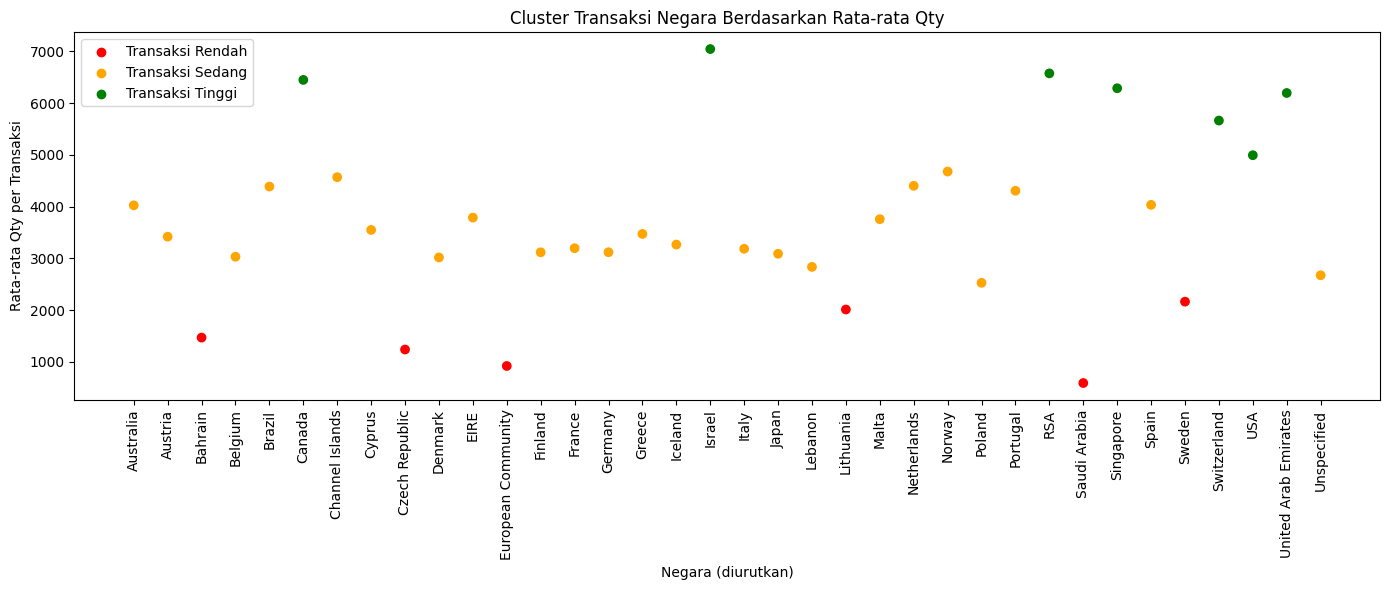

In [14]:
# === 9. Visualisasikan hasil cluster dengan scatter plot ===
print("\n=== 9. Visualisasi Cluster Negara ===")
avg_qty_per_country_sorted = avg_qty_per_country.sort_values('Country')

plt.figure(figsize=(14, 6))
plt.scatter(
    x=range(len(avg_qty_per_country_sorted)),
    y=avg_qty_per_country_sorted['AvgQty'],
    c=avg_qty_per_country_sorted['Color']
)
plt.xticks(range(len(avg_qty_per_country_sorted)), avg_qty_per_country_sorted['Country'], rotation=90)
plt.xlabel("Negara (diurutkan)")
plt.ylabel("Rata-rata Qty per Transaksi")
plt.title("Cluster Transaksi Negara Berdasarkan Rata-rata Qty")

# Tambahkan legenda warna
for level in range(3):
    plt.scatter([], [], c=color_map[level], label=f"Transaksi {cluster_labels[level]}")

plt.legend()
plt.tight_layout()
plt.show()

# **ANALISIS**

 Hasil visulaiasi scatter plot menunjukkan rata-rata kuantitas transaksi per negara, dengan titik-titik berwarna yang mewakili kategori cluster transaksi. Cluster didominasi oleh warna orange yaitu cluster sedang